## Imports

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score

## Data Pre-Processing

In [19]:
# get data
file_path_1 = '../pre_process_2/datasets_v2/supervised_1_min.csv'
file_path_2 = '../pre_process_2/datasets_v2/supervised_2_min.csv'
file_path_3 = '../pre_process_2/datasets_v2/supervised_3_min.csv'
file_path_5 = '../pre_process_2/datasets_v2/supervised_5_min.csv'
file_path_8 = '../pre_process_2/datasets_v2/supervised_8_min.csv'

df_1_min = pd.read_csv(file_path_1, delimiter=',')
df_2_min = pd.read_csv(file_path_2, delimiter=',')
df_3_min = pd.read_csv(file_path_3, delimiter=',')
df_5_min = pd.read_csv(file_path_5, delimiter=',')
df_8_min = pd.read_csv(file_path_8, delimiter=',')


# filenames with the "pvt recording"
filenames_to_remove = [
    "fp01_2.edf", "fp01_4.edf", "fp02_1.edf", "fp02_2.edf", "fp02_4.edf",
    "fp03_1.edf", "fp03_2.edf", "fp04_1.edf", "fp05_1.edf", "fp06_1.edf",
    "fp07_1.edf", "fp08_1.edf", "fp09_1.edf", "fp10_1.edf", "fp11_1.edf",
    "fp12_1.edf", "fp13_1.edf", "fp14_1.edf", "fp14_3.edf", "fp15_1.edf",
    "fp16_1.edf", "fp17_1.edf", "fp17_2.edf", "fp17_4.edf", "fp18_1.edf",
    "fp18_2.edf", "fp19_1.edf", "fp19_3.edf", "fp19_4.edf", "fp20_1.edf", 
    "fp20_3.edf"
]

# remove the unwanted instances from the dfs
df_1_min = df_1_min[~df_1_min['Filename'].isin(filenames_to_remove)]
df_2_min = df_2_min[~df_2_min['Filename'].isin(filenames_to_remove)]
df_3_min = df_3_min[~df_3_min['Filename'].isin(filenames_to_remove)]
df_5_min = df_5_min[~df_5_min['Filename'].isin(filenames_to_remove)]
df_8_min = df_8_min[~df_8_min['Filename'].isin(filenames_to_remove)]

# remove columns with null values
df_1_min = df_1_min[(df_1_min.columns.difference(['HRV_SDANN1','HRV_SDNNI1','HRV_SDANN2','HRV_SDNNI2','HRV_SDANN5','HRV_SDNNI5','HRV_ULF','HRV_VLF'], sort=False))]
df_2_min = df_2_min[(df_2_min.columns.difference(['HRV_SDANN1','HRV_SDNNI1','HRV_SDANN2','HRV_SDNNI2','HRV_SDANN5','HRV_SDNNI5','HRV_ULF','HRV_VLF'], sort=False))]
df_3_min = df_3_min[(df_3_min.columns.difference(['HRV_SDANN1','HRV_SDNNI1','HRV_SDANN2','HRV_SDNNI2','HRV_SDANN5','HRV_SDNNI5','HRV_ULF','HRV_VLF'], sort=False))]
df_5_min = df_5_min[(df_5_min.columns.difference(['HRV_SDANN1','HRV_SDNNI1','HRV_SDANN2','HRV_SDNNI2','HRV_SDANN5','HRV_SDNNI5','HRV_ULF','HRV_VLF'], sort=False))]
df_8_min = df_8_min[(df_8_min.columns.difference(['HRV_SDANN1','HRV_SDNNI1','HRV_SDANN2','HRV_SDNNI2','HRV_SDANN5','HRV_SDNNI5','HRV_ULF','HRV_VLF'], sort=False))]

# remove missing values
df_1_min = df_1_min.dropna()
df_2_min = df_2_min.dropna()
df_3_min = df_3_min.dropna()
df_5_min = df_5_min.dropna()
df_8_min = df_8_min.dropna()

# get wanted features for training data
df_features_1_min = df_1_min[(df_1_min.columns.difference(['Interval_Start', 'Interval_End', 'Filename', 'kss_answer'], sort=False))]
df_features_2_min = df_2_min[(df_2_min.columns.difference(['Interval_Start', 'Interval_End', 'Filename', 'kss_answer'], sort=False))]
df_features_3_min = df_3_min[(df_3_min.columns.difference(['Interval_Start', 'Interval_End', 'Filename', 'kss_answer'], sort=False))]
df_features_5_min = df_5_min[(df_5_min.columns.difference(['Interval_Start', 'Interval_End', 'Filename', 'kss_answer'], sort=False))]
df_features_8_min = df_8_min[(df_8_min.columns.difference(['Interval_Start', 'Interval_End', 'Filename', 'kss_answer'], sort=False))]

# final wanted features
features_1_min = df_features_1_min.columns.to_list()
features_2_min = df_features_2_min.columns.to_list()
features_3_min = df_features_3_min.columns.to_list()
features_5_min = df_features_5_min.columns.to_list()
features_8_min = df_features_8_min.columns.to_list()

### Normalization

In [ ]:
# normalize data
scaler = StandardScaler()
X_scaled_1_min = scaler.fit_transform(df_1_min[features_1_min].values)
X_scaled_2_min = scaler.fit_transform(df_2_min[features_2_min].values)
X_scaled_3_min = scaler.fit_transform(df_3_min[features_3_min].values)
X_scaled_5_min = scaler.fit_transform(df_5_min[features_5_min].values)
X_scaled_8_min = scaler.fit_transform(df_8_min[features_8_min].values)

### Descretrization

In [21]:
# descretize the value of KSS
labels_1_min = (df_1_min['kss_answer'] > 6).astype(int)
labels_2_min = (df_2_min['kss_answer'] > 6).astype(int)
labels_3_min = (df_3_min['kss_answer'] > 6).astype(int)
labels_5_min = (df_5_min['kss_answer'] > 6).astype(int)
labels_8_min = (df_8_min['kss_answer'] > 6).astype(int)

### Train Test Split

In [22]:
# test and train data split
X_train_1_min, X_test_1_min, y_train_1_min, y_test_1_min = train_test_split(X_scaled_1_min, labels_1_min, test_size=0.20, random_state=42)
X_train_2_min, X_test_2_min, y_train_2_min, y_test_2_min = train_test_split(X_scaled_2_min, labels_2_min, test_size=0.20, random_state=42)
X_train_3_min, X_test_3_min, y_train_3_min, y_test_3_min = train_test_split(X_scaled_3_min, labels_3_min, test_size=0.20, random_state=42)
X_train_5_min, X_test_5_min, y_train_5_min, y_test_5_min = train_test_split(X_scaled_5_min, labels_5_min, test_size=0.20, random_state=42)
X_train_8_min, X_test_8_min, y_train_8_min, y_test_8_min = train_test_split(X_scaled_8_min, labels_8_min, test_size=0.20, random_state=42)

### Create Models

In [24]:
# reset current session and optimizers states
K.clear_session()

# define model for 1 min
model_1_min = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_dim=X_train_1_min.shape[1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# compile the model
optimizer = Adam(learning_rate=0.001)
model_1_min.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# define model for for 2 min
model_2_min = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_dim=X_train_2_min.shape[1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# compile the model
optimizer = Adam(learning_rate=0.001)
model_2_min.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# define model for for 3 min
model_3_min = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_dim=X_train_3_min.shape[1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# compile the model
optimizer = Adam(learning_rate=0.001)
model_3_min.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# define model for for 5 min
model_5_min = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_dim=X_train_5_min.shape[1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# compile the model
optimizer = Adam(learning_rate=0.001)
model_5_min.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# define model for for 8 min
model_8_min = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_dim=X_train_8_min.shape[1]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# compile the model
optimizer = Adam(learning_rate=0.001)
model_8_min.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\duart\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Train Models

In [25]:
# train models
history_1_min = model_1_min.fit(X_train_1_min, y_train_1_min, epochs=200, batch_size=32, validation_split=0.2)
history_2_min = model_2_min.fit(X_train_2_min, y_train_2_min, epochs=200, batch_size=32, validation_split=0.2)
history_3_min = model_3_min.fit(X_train_3_min, y_train_3_min, epochs=200, batch_size=32, validation_split=0.2)
history_5_min = model_5_min.fit(X_train_5_min, y_train_5_min, epochs=200, batch_size=32, validation_split=0.2)
history_8_min = model_8_min.fit(X_train_8_min, y_train_8_min, epochs=200, batch_size=32, validation_split=0.2)

Epoch 1/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5144 - loss: 0.7103 - val_accuracy: 0.6049 - val_loss: 0.6600
Epoch 2/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.5863 - loss: 0.6783 - val_accuracy: 0.6221 - val_loss: 0.6488
Epoch 3/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.6140 - loss: 0.6514 - val_accuracy: 0.6466 - val_loss: 0.6397
Epoch 4/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.6172 - loss: 0.6475 - val_accuracy: 0.6451 - val_loss: 0.6363
Epoch 5/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.6370 - loss: 0.6370 - val_accuracy: 0.6494 - val_loss: 0.6327
Epoch 6/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.6332 - loss: 0.6322 - val_accuracy: 0.6624 - val_loss: 0.6267
Epoch 7/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.6306 - loss: 0.6355 - val_accuracy: 0.6652 - val_loss: 0.6211
Epoch 8/200
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.6196 - loss: 0.6455 - val_accura

### Evaluation

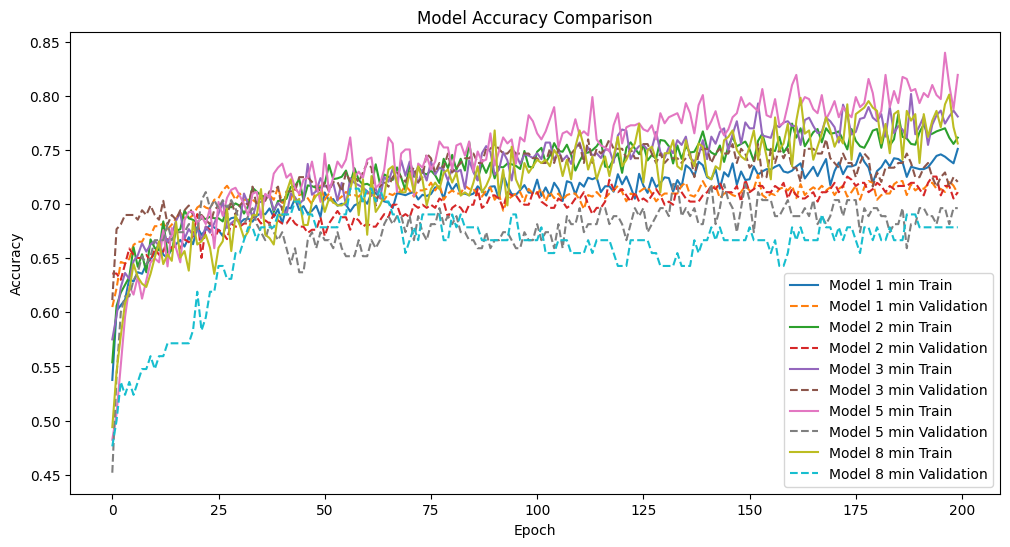

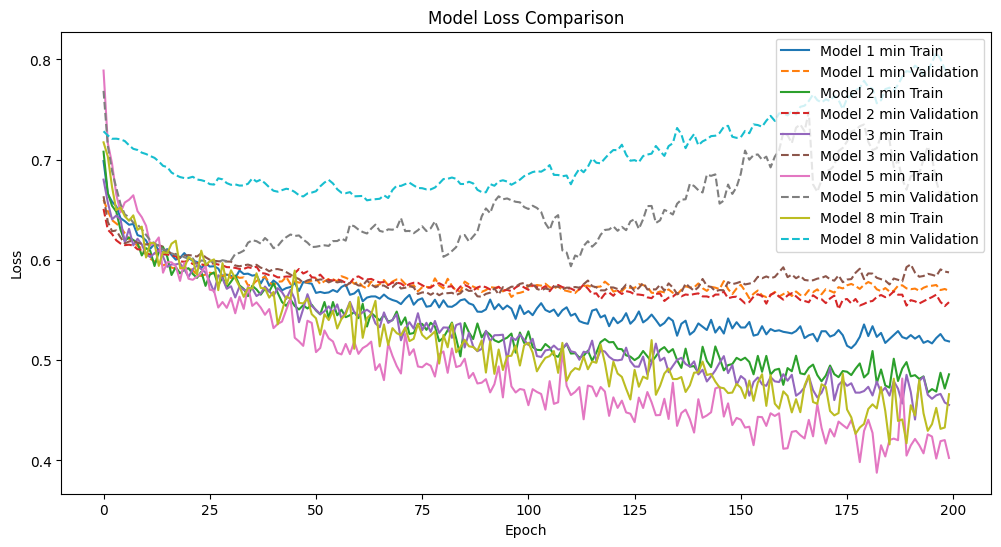

In [26]:
# all histories and model 
histories = [history_1_min, history_2_min, history_3_min, history_5_min, history_8_min]
model_names = ['Model 1 min', 'Model 2 min', 'Model 3 min', 'Model 5 min', 'Model 8 min']

# plot accuracy for all models
plt.figure(figsize=(12, 6))
for history, name in zip(histories, model_names):
    plt.plot(history.history['accuracy'], label=f'{name} Train')
    plt.plot(history.history['val_accuracy'], label=f'{name} Validation', linestyle='--')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

# plot loss for all models
plt.figure(figsize=(12, 6))
for history, name in zip(histories, model_names):
    plt.plot(history.history['loss'], label=f'{name} Train')
    plt.plot(history.history['val_loss'], label=f'{name} Validation', linestyle='--')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

## Predictions

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step
Final Test Predictions Results for Model 1 min:
  Accuracy: 0.736
  Precision: 0.722
  Recall: 0.704
  F1 Score: 0.713
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Final Test Predictions Results for Model 2 min:
  Accuracy: 0.737
  Precision: 0.723
  Recall: 0.750
  F1 Score: 0.736
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Final Test Predictions Results for Model 3 min:
  Accuracy: 0.738
  Precision: 0.752
  Recall: 0.603
  F1 Score: 0.670
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Final Test Predictions Results for Model 5 min:
  Accuracy: 0.673
  Precision: 0.649
  Recall: 0.641
  F1 Score: 0.645
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000022F6D3D9820> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing ten

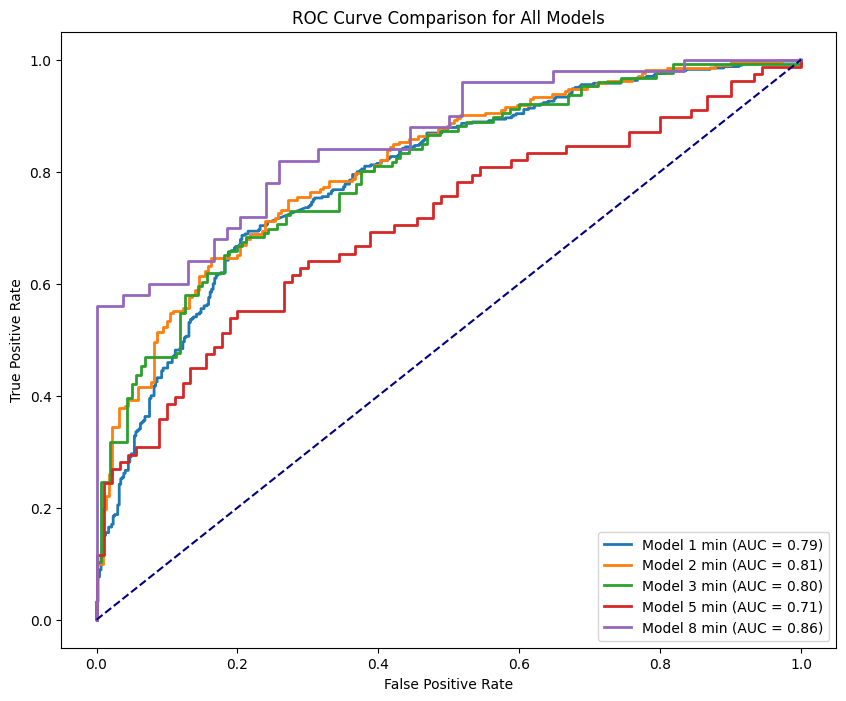

In [28]:
# models, test data, and names
models = [model_1_min, model_2_min, model_3_min, model_5_min, model_8_min]
X_tests = [X_test_1_min, X_test_2_min, X_test_3_min, X_test_5_min, X_test_8_min]
y_tests = [y_test_1_min, y_test_2_min, y_test_3_min, y_test_5_min, y_test_8_min]
model_names = ['Model 1 min', 'Model 2 min', 'Model 3 min', 'Model 5 min', 'Model 8 min']

# store results
all_metrics = []

# ROC plot setup
plt.figure(figsize=(10, 8))

for model, X_test, y_test, name in zip(models, X_tests, y_tests, model_names):
    # make predictions
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int).reshape(-1)  # threshold and reshape to binary

    # evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    
    # append metrics results
    all_metrics.append((name, accuracy, precision, recall, f1))
    
    # print results for the model
    print(f"Final Test Predictions Results for {name}:")
    print(f'  Accuracy: {accuracy:.3f}')
    print(f'  Precision: {precision:.3f}')
    print(f'  Recall: {recall:.3f}')
    print(f'  F1 Score: {f1:.3f}')
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# plot all ROC curves together
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison for All Models')
plt.legend(loc="lower right")
plt.show()

## CM

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step


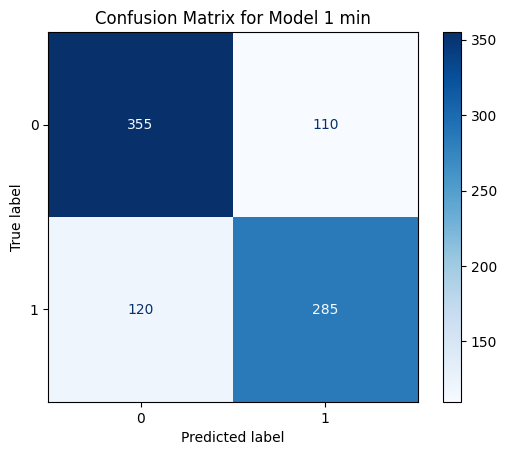

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step


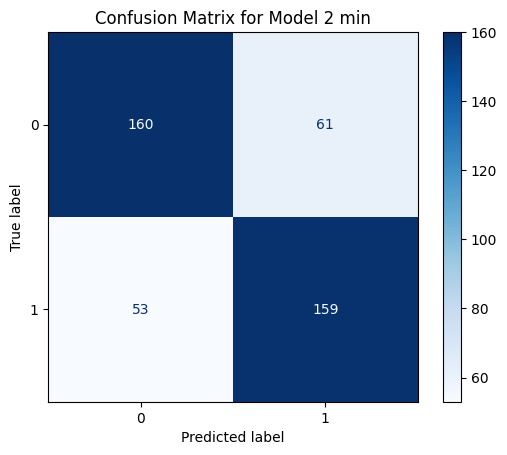

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step


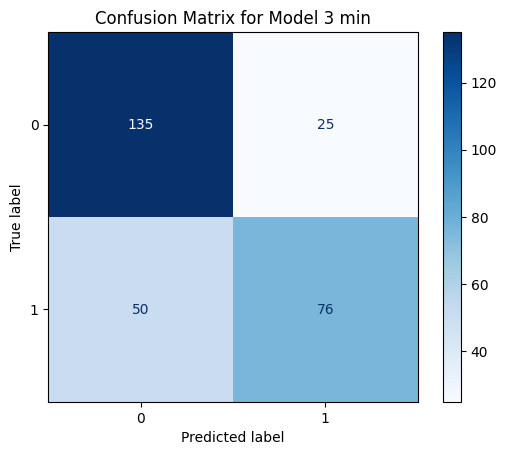

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step


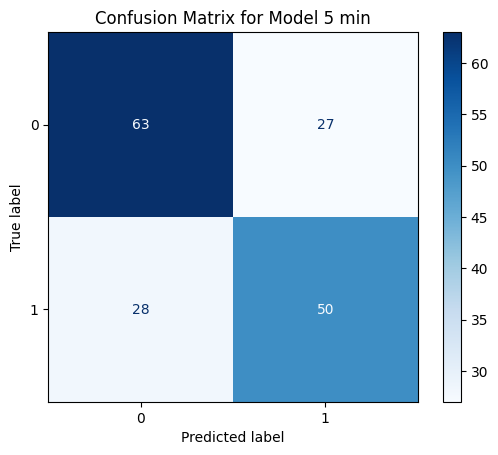

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step


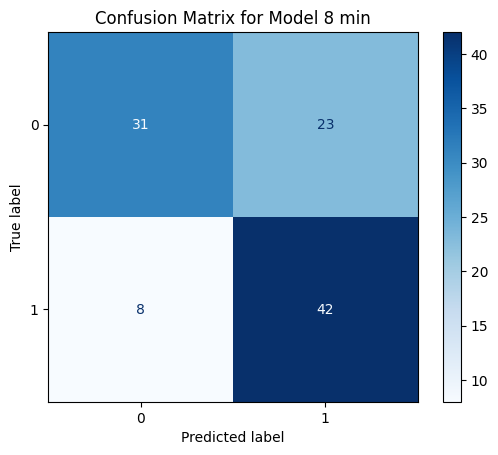

In [29]:
# CM
for model, X_test, y_test, name in zip(models, X_tests, y_tests, model_names):
    y_pred_binary = (model.predict(X_test) > 0.5).astype(int).reshape(-1)
    cm = confusion_matrix(y_test, y_pred_binary)
    
    # plot CM
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

### Evaluation Resume


Summary of Evaluation Metrics for All Models:
Model 1 min: Accuracy=0.736, Precision=0.722, Recall=0.704, F1 Score=0.713
Model 2 min: Accuracy=0.737, Precision=0.723, Recall=0.750, F1 Score=0.736
Model 3 min: Accuracy=0.738, Precision=0.752, Recall=0.603, F1 Score=0.670
Model 5 min: Accuracy=0.673, Precision=0.649, Recall=0.641, F1 Score=0.645
Model 8 min: Accuracy=0.702, Precision=0.646, Recall=0.840, F1 Score=0.730


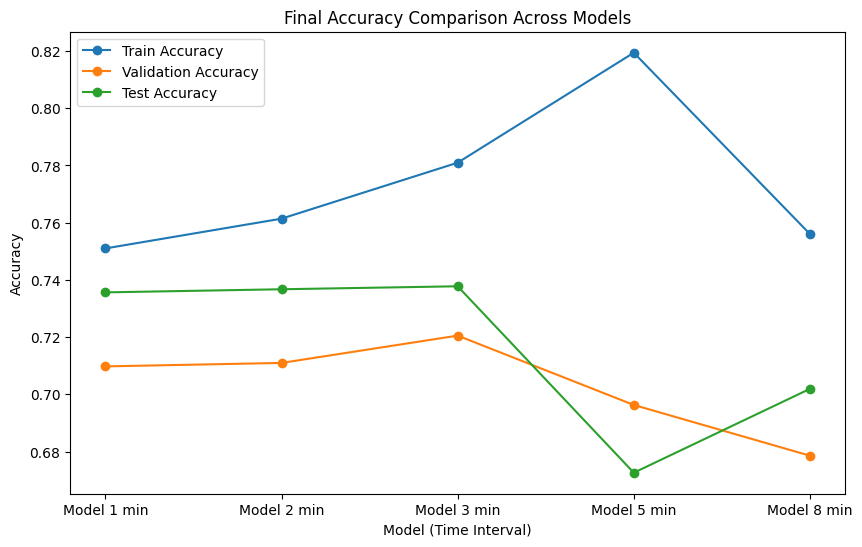

In [ ]:
# models evaluation
print("\nSummary of Evaluation Metrics for All Models:")
for name, accuracy, precision, recall, f1 in all_metrics:
    print(f'{name}: Accuracy={accuracy:.3f}, Precision={precision:.3f}, Recall={recall:.3f}, F1 Score={f1:.3f}')


# training and validation accuracies for each model
final_train_accuracies = [history.history['accuracy'][-1] for history in histories]
final_val_accuracies = [history.history['val_accuracy'][-1] for history in histories]

# extract test accuracies from all_metrics
final_test_accuracies = [metric[1] for metric in all_metrics]  # accuracy is the second element in each tuple in all_metrics

# plot all accuracies
plt.figure(figsize=(10, 6))
plt.plot(model_names, final_train_accuracies, marker='o', label='Train Accuracy')
plt.plot(model_names, final_val_accuracies, marker='o', label='Validation Accuracy')
plt.plot(model_names, final_test_accuracies, marker='o', label='Test Accuracy')
plt.title('Final Accuracy Comparison Across Models')
plt.xlabel('Model (Time Interval)')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()